In [20]:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io
from scipy import signal
from IPython.display import display
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols


/Users/personal/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Calcular la media entre los electrodos 8, 44, 80, 131 y 185 (el primer electrodo es el 0) y realizar una figura que muestre las frecuencias en el eje Y, los epochs en el eje X, y la potencia usando una escala de color

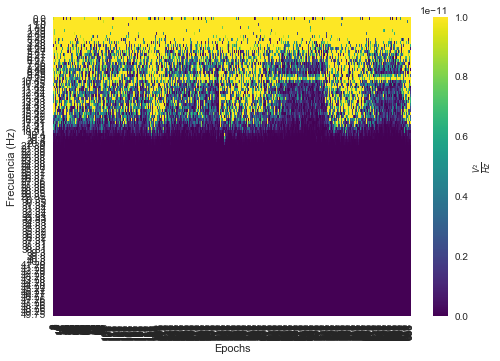

In [3]:
x = (sc.io.loadmat('datasetP/P02.mat'))['data']

epochs = len(x)
# epochs = 2
electrodes = 256
measures = 201

powersDF = None

for i in range(epochs):
    epoch = pd.DataFrame(x[i])
    fourier = sc.signal.welch(epoch.loc[[7, 43, 79, 130, 184]].mean(), nperseg=measures)
    if powersDF is None:
        powersDF = pd.DataFrame(index = np.round(np.multiply(fourier[0], 100), 2))
    powersDF[i] = pd.Series(fourier[1], index = powersDF.index)
sns.heatmap(powersDF, cmap = 'viridis', vmin = 0, vmax = 1e-11, cbar_kws = {'label': r'$\frac{V^{2}}{Hz}$'})
plt.xlabel('Epochs')
plt.ylabel('Frecuencia (Hz)')
plt.show()


## Calcular los valores de cada banda de frecuencia, promediados entre los electrodos (todos) y epochs para cada sujeto

In [4]:
deltaRange = [0.0 / 100.0, 4.0 / 100.0]
thetaRange = [4.0 / 100.0, 8.0 / 100.0]
alphaRange = [8.0 / 100.0, 13.0 / 100.0]
betaRange = [13.0 / 100.0, 30.0 / 100.0]
gammaRange = [30.0 / 100.0, 50.0 / 100.0]
classification = ['P'] * 10 + ['S'] * 10
names = map((lambda x: ('0'+ str(x))[-2:]), range(1,11))
# names = ['02']
datasets = ['datasetP/P', 'datasetS/S']
# datasets = ['datasetP/P']

subjectsDelta = []
subjectsTheta = []
subjectsAlpha = []
subjectsBeta = []
subjectsGamma = []
bandNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']

df = pd.DataFrame(columns = bandNames)

for dataset in datasets:
    for name in names:
        x = (sc.io.loadmat(dataset + name + '.mat'))['data']
        epochs = len(x)
        electrodes = 256
        measures = 201

        epochAcum = None
        for i in range(epochs):
            epoch = (pd.DataFrame(x[i])).sum()
            if epochAcum is None:
                epochAcum = epoch
            else:
                epochAcum = epochAcum.add(epoch)
        
        epochAcum = epochAcum.divide(epochs * electrodes)
        fourier = sc.signal.welch(epochAcum, nperseg=measures)

        frecs = fourier[0]
        powers = fourier[1]
        theta = (i for i, v in enumerate(frecs) if v >= thetaRange[0] and v < thetaRange[1]).next()
        alpha = (i for i, v in enumerate(frecs) if v >= alphaRange[0] and v < alphaRange[1]).next()
        beta = (i for i, v in enumerate(frecs) if v >= betaRange[0] and v < betaRange[1]).next()
        gamma = (i for i, v in enumerate(frecs) if v >= gammaRange[0] and v < gammaRange[1]).next()
        subjectsDelta.append(powers[:theta].mean())
        subjectsTheta.append(powers[theta:alpha].mean())
        subjectsAlpha.append(powers[alpha:beta].mean())
        subjectsBeta.append(powers[beta:gamma].mean())
        subjectsGamma.append(powers[gamma:].mean())
        index = len(subjectsDelta)
        df = df.append((pd.Series({bandNames[0]: subjectsDelta[-1], bandNames[1]: subjectsTheta[-1], bandNames[2]: subjectsAlpha[-1], bandNames[3]: subjectsBeta[-1], bandNames[4]: subjectsGamma[-1]})).rename('Subject ' + names[(index - 1) % 10] + ' ' + classification[index - 1]))
display(df)

,Delta,Theta,Alpha,Beta,Gamma
Subject 01 P,9.095474e-15,5.914937e-16,2.248727e-16,5.647098e-17,2.287231e-26
Subject 02 P,5.836480e-15,1.816941e-16,8.200576e-17,1.843154e-17,3.572753e-27
Subject 03 P,8.541264e-15,3.263710e-16,1.603465e-16,2.244956e-17,1.174758e-26
Subject 04 P,8.642325e-16,2.064799e-17,2.703804e-18,3.799370e-19,6.767615e-27
Subject 05 P,3.782237e-14,6.217611e-15,2.435598e-15,4.572183e-16,2.907462e-25
Subject 06 P,2.544677e-16,9.178082e-18,1.723626e-18,4.044180e-19,1.545403e-27
Subject 07 P,1.231416e-14,2.316077e-15,8.594945e-17,1.733532e-17,7.339451e-26
Subject 08 P,3.826212e-14,5.502114e-16,5.510924e-17,9.589336e-18,4.167759e-25
Subject 09 P,1.043020e-12,1.629944e-13,1.320894e-13,3.958321e-14,3.146001e-24
Subject 10 P,3.203127e-16,6.027165e-18,1.871741e-18,4.235000e-19,2.226020e-27


## Tomar la potencia de cada sujeto en la banda Alpha y graficar cada uno de los graficos categóricos de seaborn

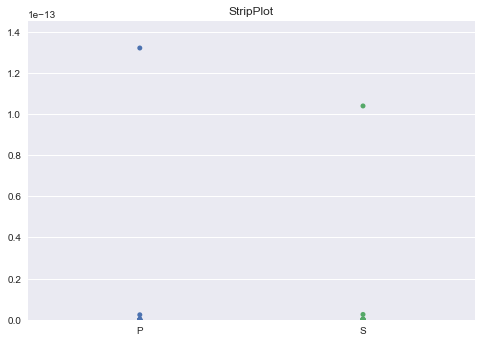

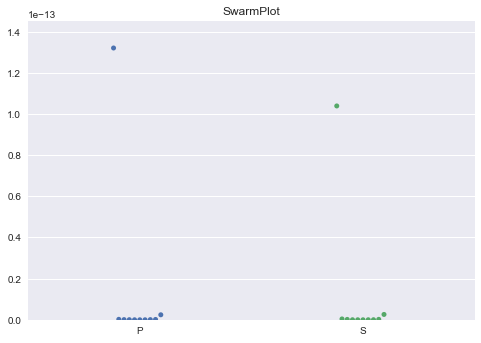

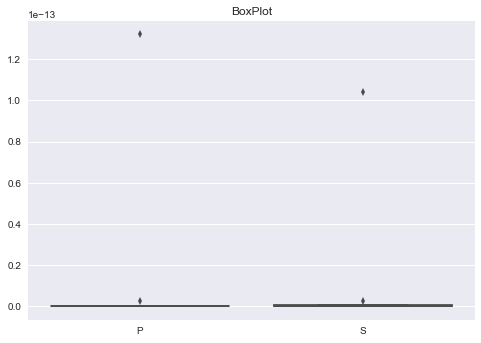

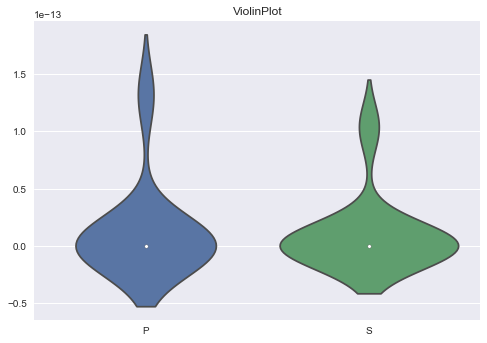

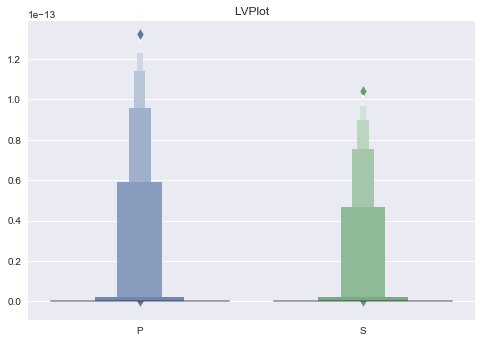

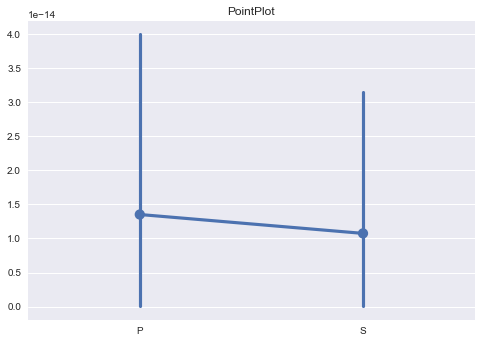

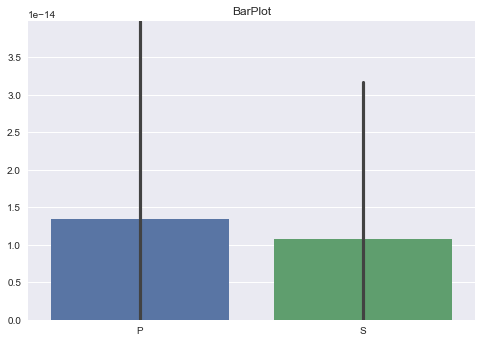

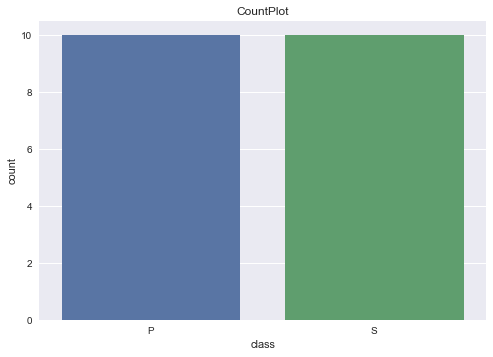

In [5]:
df = pd.DataFrame({'P': subjectsAlpha[:10], 'S': subjectsAlpha[10:]})
plotNames = ['StripPlot', 'SwarmPlot', 'BoxPlot', 'ViolinPlot', 'LVPlot', 'PointPlot', 'BarPlot', 'CountPlot']
plots = [sns.stripplot, sns.swarmplot, sns.boxplot, sns.violinplot, sns.lvplot, sns.pointplot, sns.barplot]

for i, plotClass in enumerate(plots):
    fig = plotClass(data = df)
    if (i < 2):
        fig.set_ylim([0, df['P'].max() * 1.1])
    plt.title(plotNames[i])
    plt.show()

df_new = pd.DataFrame({'class': ['P'] * 10 + ['S'] * 10, 'values': subjectsAlpha})
sns.countplot(x = 'class', data = df_new)
plt.title(plotNames[-1])
plt.show()


## ¿Cuál recomendaría para graficar y comparar distribuciones?
Elegimos ________ porque _______

## Para cada banda de frecuencia, graficarla y realizar un test estadístico apropiado

In [30]:
formula = 'Value ~ C(Band) + C(Type) + C(Band):C(Type)'
subjectsBands = [subjectsDelta, subjectsTheta, subjectsAlpha, subjectsBeta, subjectsGamma]
dfGeneral = pd.DataFrame()
for i, subjectsBand in enumerate(subjectsBands):
    df = pd.DataFrame({'P': subjectsBand[:10], 'S': subjectsBand[10:], 'Band': bandNames[i]})
    dfCustomP = pd.DataFrame({'Value': subjectsBand[:10], 'Type': 'P', 'Band': bandNames[i]})
    dfCustomS = pd.DataFrame({'Value': subjectsBand[10:], 'Type': 'S', 'Band': bandNames[i]})
    dfGeneral = dfGeneral.append(dfCustomP)
    dfGeneral = dfGeneral.append(dfCustomS)
#     sns.violinplot(data = df)
#     plt.title('ViolinPlot ' + bandNames[i])
#     plt.show()
    t, p = sc.stats.ttest_ind(df['P'], df['S'], equal_var = False)
    print 'welch'
    print t, p
    s, p = sc.stats.f_oneway(df['P'], df['S'])
    print 'one way'
    print s, p

model = ols(formula, dfGeneral).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)


welch
0.0137981645912 0.989143267195
one way
0.000190389346087 0.98914279445
welch
-0.583467139525 0.570864666906
one way
0.340433902905 0.566818671158
welch
0.165286308746 0.870662770264
one way
0.027319563859 0.870560804491
welch
0.136567766034 0.89294066375
one way
0.0186507547195 0.892888324051
welch
-0.955596729665 0.364170793562
one way
0.913165109746 0.351934905283
                       sum_sq    df         F    PR(>F)
C(Band)          1.810898e-25   4.0  2.004590  0.100563
C(Type)          4.622172e-28   1.0  0.020466  0.886562
C(Band):C(Type)  3.223561e-27   4.0  0.035683  0.997523
Residual         2.032596e-24  90.0       NaN       NaN


## Repetir para los valores normalizados
Este punto queda incluído en el experimento anterior, pues consideramos el promedio de los valores para cada ancho de banda.

## Computar una medida de información intra-electrodo. Calcular la media entre canales y epochs para cada sujeto. Realizar el gráfico elegido en la sección anterior, acompañado del test estadístico apropiado

## Repetir para una medida inter-electrodo